## Libraries import + matplotlib preset

In [1]:
import os
import re   
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
# pixel in inches for figsize
px = 1/plt.rcParams['figure.dpi']
# default figsize for all figures
plt.rcParams['figure.figsize'] = [1000*px, 1000*px]

## Crate paths for csv files

In [2]:
CURR_DIR = os.getcwd()
print(CURR_DIR)
data_path = os.path.join(CURR_DIR, 'datasets/Sleeve-material-loss.csv')

/Users/wszczawinski/Projects/master-thesis/analyses


## Create dataframe from .cvs

In [3]:
df = pd.read_csv(data_path, sep=';', decimal=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61902 entries, 0 to 61901
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number In Batch  61902 non-null  int64  
 1   Count            61902 non-null  int64  
 2   Time (ms)        61902 non-null  int64  
 3   Timestamp        61902 non-null  object 
 4   Trigger          61902 non-null  object 
 5   obl X            61902 non-null  object 
 6   obl Y            61902 non-null  object 
 7   Odczyt Z         61902 non-null  float64
 8   Odczyt otwor     61902 non-null  object 
 9   Odczyt wal       61902 non-null  object 
 10  Kat obrotu       61902 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 5.2+ MB


## Dropping not relevant columns

In [4]:
df = df.drop(['Number In Batch', 'Time (ms)', 'Timestamp', 'Trigger'], axis = 1)

df


,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
0,1,"0,0073","0,0224",0.000,"0,0236","0,6376",71.96
1,2,"0,0047","0,0150",0.000,"0,0157","0,6383",72.47
2,3,"0,0024","0,0077",0.000,"0,0081","0,6391",72.97
3,4,"0,0001","0,0003",0.000,"0,0003","0,6394",73.55
4,5,"-0,0021","-0,0075",0.000,"-0,0078","0,6399",74.16
...,...,...,...,...,...,...,...
61897,61898,Over Range,Over Range,87.846,Over Range,"0,6614",28.91
61898,61899,Over Range,Over Range,87.846,Over Range,"0,6614",28.91
61899,61900,Over Range,Over Range,87.846,Over Range,"0,6614",28.91
61900,61901,Over Range,Over Range,87.846,Over Range,"0,6614",28.91


## Removing rows with measurments over and under range of the sensor

In [5]:
for col in ['obl X', 'obl Y', 'Odczyt otwor', "Odczyt wal"]:
    df = df[df[col].str.contains("Over Range")==False]
    df = df[df[col].str.contains("Under Range")==False]
    df[col] = pd.to_numeric(df[col].apply(lambda x: re.sub(',', '.', str(x))))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51675 entries, 0 to 61710
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Count         51675 non-null  int64  
 1   obl X         51675 non-null  float64
 2   obl Y         51675 non-null  float64
 3   Odczyt Z      51675 non-null  float64
 4   Odczyt otwor  51675 non-null  float64
 5   Odczyt wal    51675 non-null  float64
 6   Kat obrotu    51675 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.2 MB


## Data exploration

In [6]:
df.head(130)

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
0,1,0.0073,0.0224,0.000,0.0236,0.6376,71.96
1,2,0.0047,0.0150,0.000,0.0157,0.6383,72.47
2,3,0.0024,0.0077,0.000,0.0081,0.6391,72.97
3,4,0.0001,0.0003,0.000,0.0003,0.6394,73.55
4,5,-0.0021,-0.0075,0.000,-0.0078,0.6399,74.16
...,...,...,...,...,...,...,...
125,126,-0.7426,0.9091,0.000,1.1739,0.6049,129.24
126,127,-0.7566,0.9171,0.000,1.1888,0.6042,129.53
127,128,-0.7724,0.9253,0.002,1.2054,0.6037,129.85
128,129,-0.7832,0.9299,0.004,1.2158,0.6078,130.10


In [7]:
df.describe()

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
count,51675.000000,51675.000000,51675.000000,51675.000000,51675.000000,51675.000000,51675.000000
mean,30158.613914,0.009142,0.504022,42.923310,0.626535,0.532970,86.562686
std,17734.121616,0.471987,0.301328,25.300624,0.418502,0.048372,29.789132
min,1.000000,-0.882400,-0.099100,0.000000,-0.099600,0.018500,34.850000
25%,14823.500000,-0.288800,0.239950,20.926000,0.248200,0.498800,59.440000
50%,29795.000000,0.000000,0.511100,42.288000,0.584500,0.532900,88.130000
75%,45328.500000,0.230800,0.761500,64.706000,1.002700,0.566600,114.880000
max,61711.000000,1.125500,1.084600,87.846000,1.371800,0.664800,130.210000


In [8]:
df.corr()

,Count,obl X,obl Y,Odczyt Z,Odczyt otwor,Odczyt wal,Kat obrotu
Count,1.000000,0.021557,0.184182,0.999994,0.128786,-0.934533,-0.021159
obl X,0.021557,1.000000,-0.204660,0.021464,-0.033968,0.035762,-0.951339
obl Y,0.184182,-0.204660,1.000000,0.184344,0.976481,-0.277556,0.250554
Odczyt Z,0.999994,0.021464,0.184344,1.000000,0.128946,-0.934536,-0.021087
Odczyt otwor,0.128786,-0.033968,0.976481,0.128946,1.000000,-0.214990,0.086834
Odczyt wal,-0.934533,0.035762,-0.277556,-0.934536,-0.214990,1.000000,-0.040446
Kat obrotu,-0.021159,-0.951339,0.250554,-0.021087,0.086834,-0.040446,1.000000


### Single arrays from columns for ploting purposes

In [9]:
x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
hole = df['Odczyt otwor']
shaft = df['Odczyt wal']
angle = df['Kat obrotu']
count = df['Count']

### Correlation between X and angle

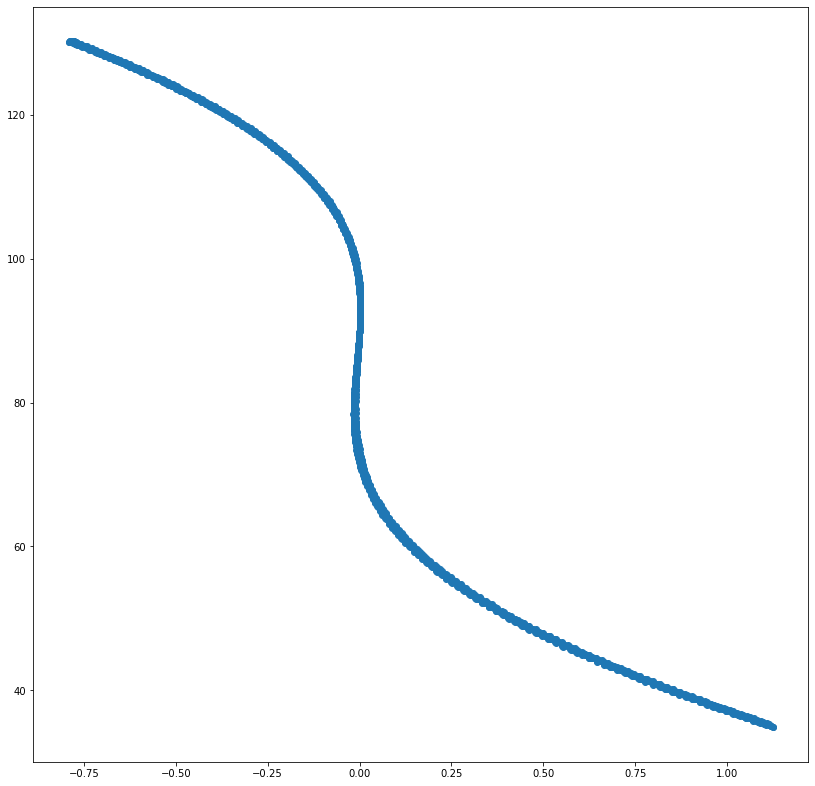

In [10]:
angles = angle[:2000]
xs = x[:2000]
plt.scatter(xs, angles)
plt.show()

array([[<AxesSubplot:title={'center':'Count'}>,
        <AxesSubplot:title={'center':'obl X'}>,
        <AxesSubplot:title={'center':'obl Y'}>],
       [<AxesSubplot:title={'center':'Odczyt Z'}>,
        <AxesSubplot:title={'center':'Odczyt otwor'}>,
        <AxesSubplot:title={'center':'Odczyt wal'}>],
       [<AxesSubplot:title={'center':'Kat obrotu'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

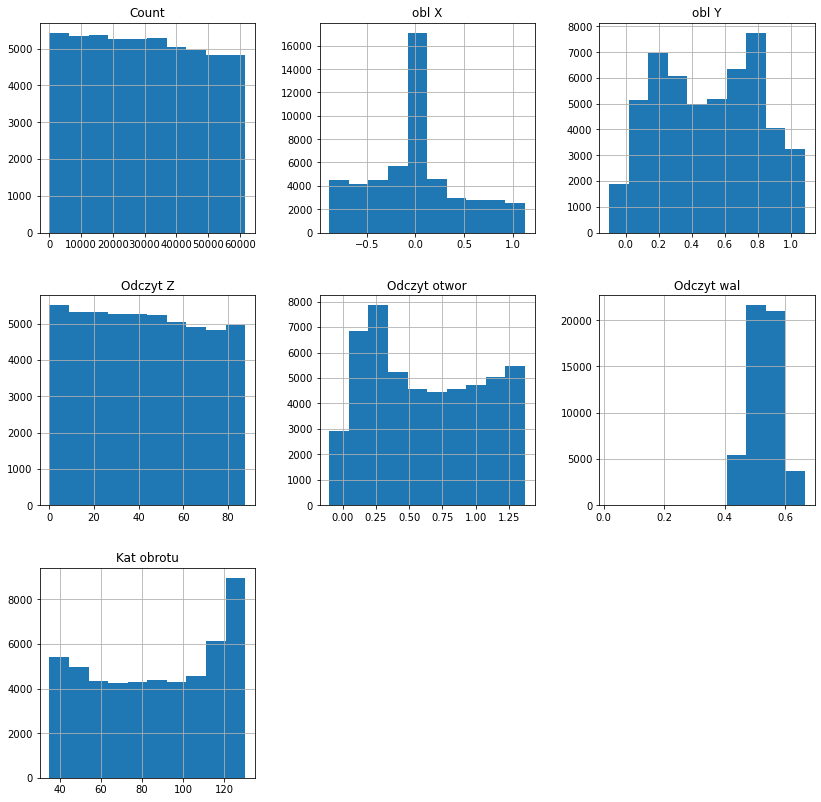

In [11]:
df.hist()

<AxesSubplot:>

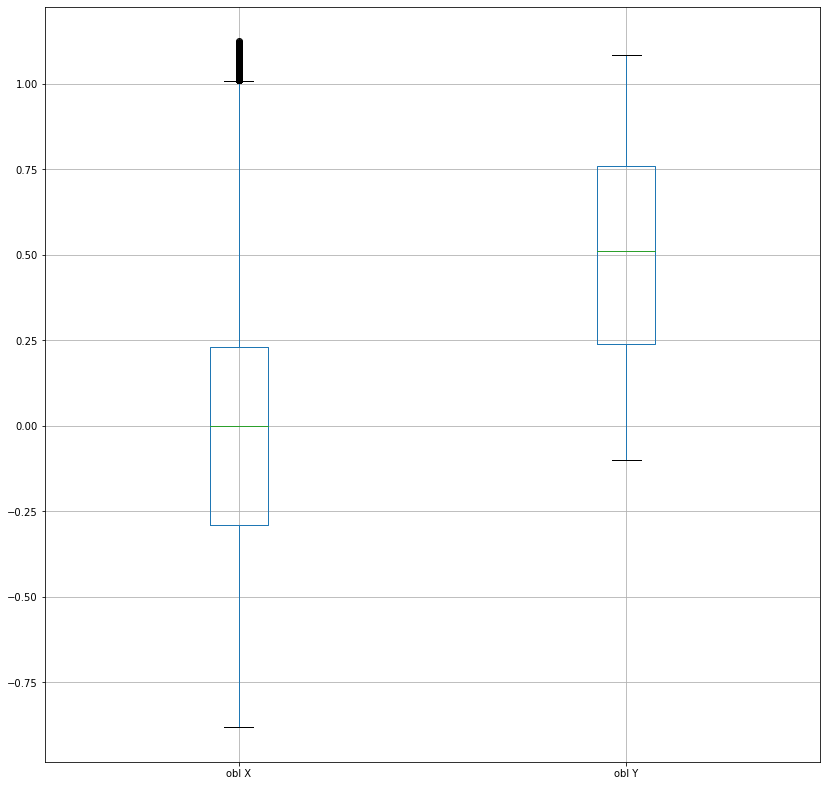

In [12]:
df.boxplot(column=['obl X', 'obl Y'])

Maximum angle value: 
130.21
Minimum angle value: 
34.85


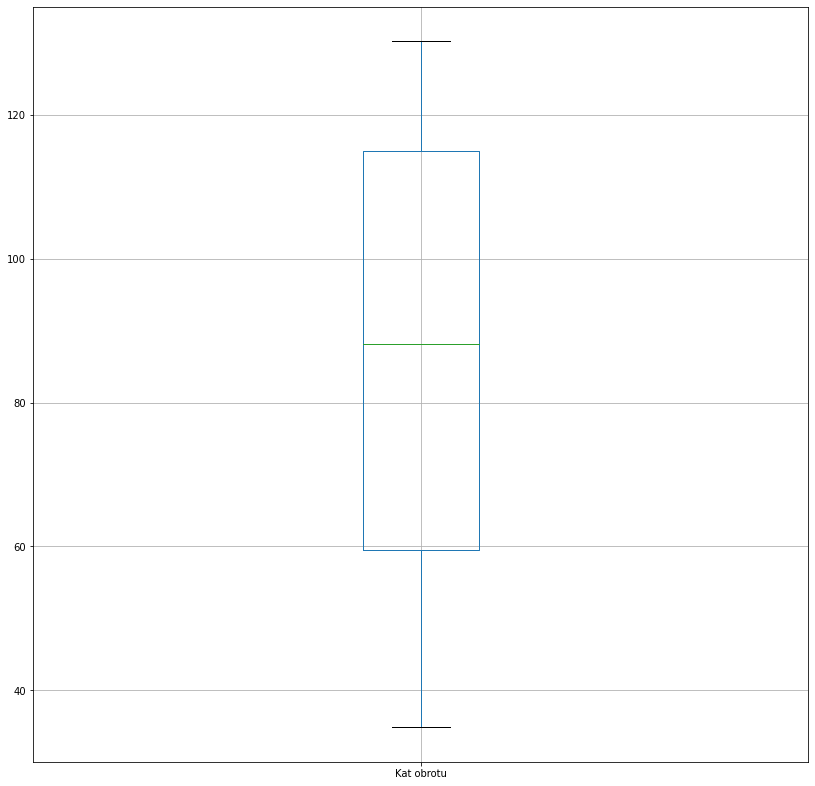

In [13]:
df.boxplot(column=['Kat obrotu'])
print('Maximum angle value: ')
print(df['Kat obrotu'].max())
print('Minimum angle value: ')
print(df['Kat obrotu'].min())

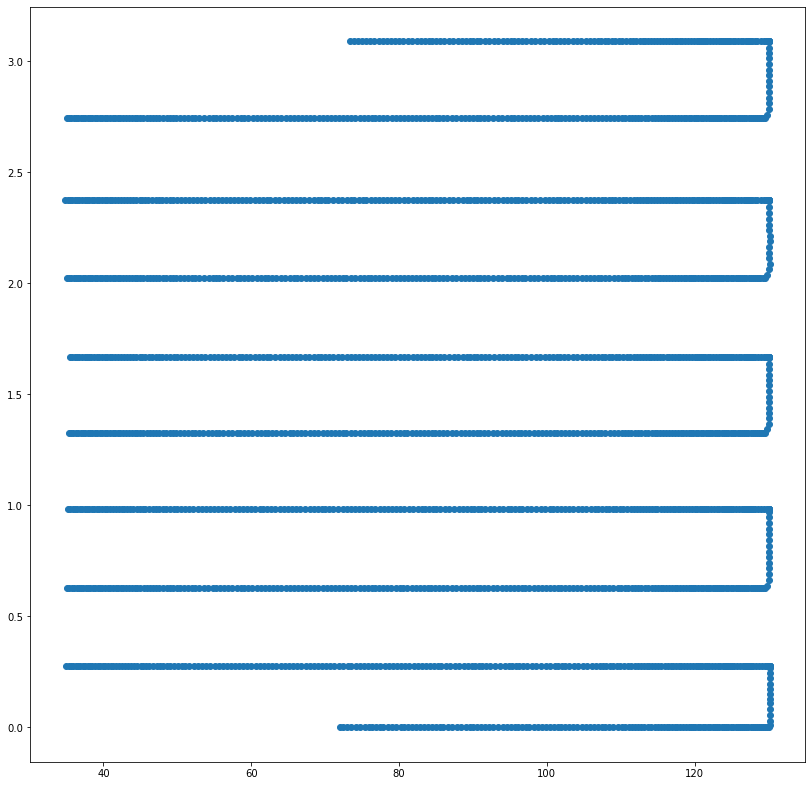

In [14]:
holes = hole[:2000]
angles = angle[:2000]
zs = z[:2000]
cs = count[:2000]


plt.scatter(angles, zs)
plt.show()

## 3D plotting

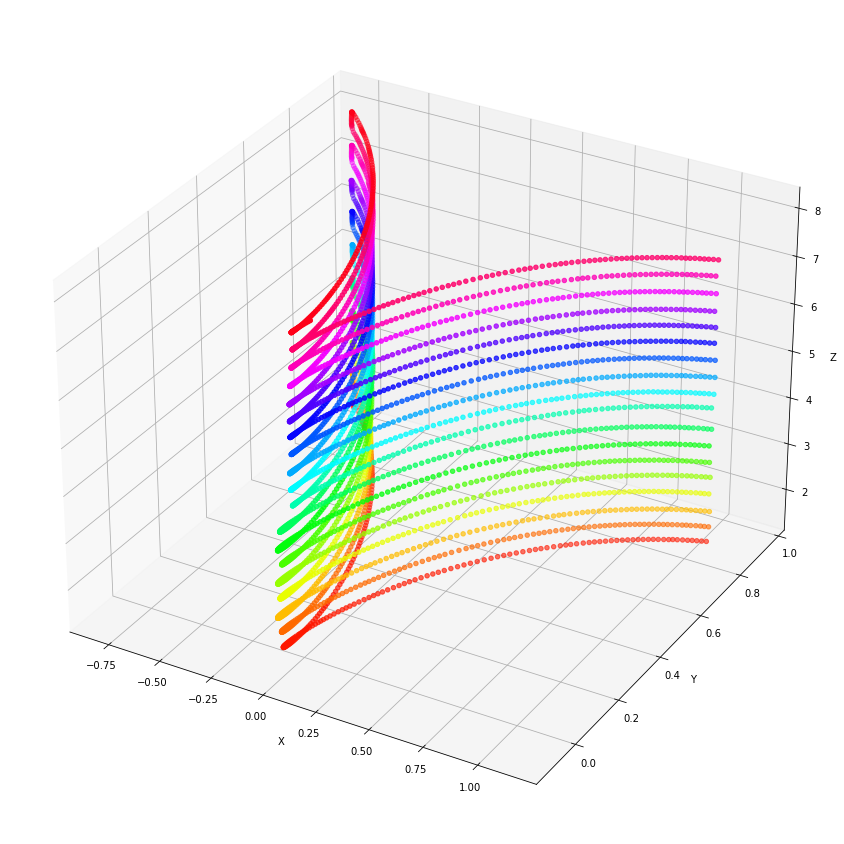

In [15]:

plt.figure(figsize=(1100*px, 1100*px))

ax = plt.axes(projection ='3d')



xs = x[1000: 5000]
ys = y[1000: 5000]
zs = z[1000: 5000]
angles = angle[1000: 5000]/100
cs = count[1000: 5000]


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(xs, ys, zs, c=zs, cmap='hsv')


plt.show()

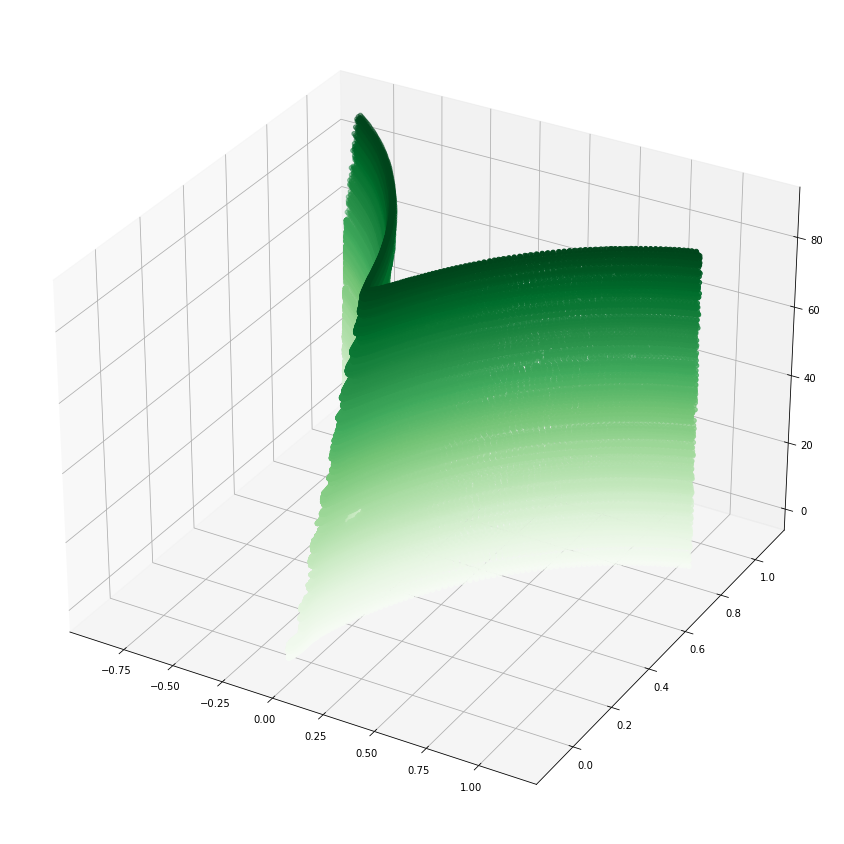

In [16]:
plt.figure(figsize=(1100*px, 1100*px))
ax = plt.axes(projection ='3d')

x = df['obl X']
y = df['obl Y']
z = df['Odczyt Z']
ax.scatter3D(x, y, z, c=z, cmap='Greens');
plt.show()

# z_points = 15 * np.random.random(100)
# x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
# y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
# ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

In [17]:
import dash_core_components as dcc
import plotly.graph_objects as go


fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

fig.show()
